<a href="https://colab.research.google.com/github/robswyn/Machine-Learning/blob/master/PneumoniaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import zip file wth images


In [1]:
from zipfile import ZipFile
file_name = "chest_xray.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Delete Zip file


In [0]:
!rm -rf data.zip

Import Dependacies

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../content"))

from os import listdir, makedirs
from os.path import join, exists, expanduser

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
from keras.utils.data_utils import Sequence
import sys
from PIL import *
sys.modules['Image'] = Image 
print(os.listdir("../content/chest_xray/train"))
# Any results you write to the current directory are saved as output.

['.config', 'chest_xray.zip', '__MACOSX', 'chest_xray', 'sample_data']
['PNEUMONIA', '.DS_Store', 'NORMAL']


In [0]:
img_width, img_height = 224, 224
train_data = '../content/chest_xray/train'
test_data = '../content/chest_xray/test'
val_data = '../content/chest_xray/val'

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [16]:
#import inception with pre-trained weights. do not include fully #connected layers
from keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet', include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
result = model.output
result = GlobalAveragePooling2D()(result)
# add a fully-connected layer
result = Dense(512, activation='relu')(result)
# and a fully connected output/classification layer
predictions = Dense(2, activation='sigmoid')(result)

In [0]:
inception_transfer = Model(inputs=model.input, outputs=predictions)

In [19]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [20]:
import tensorflow as tf
with tf.device("/device:GPU:0"):
    history_pretrained = inception_transfer.fit_generator(
    train_generator,
    epochs=16, shuffle = True, verbose = 1, validation_data = test_generator)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/16
326/326 [==============================] - 187s 573ms/step - loss: 0.3175 - acc: 0.8646 - val_loss: 0.3530 - val_acc: 0.8413
Epoch 2/16
326/326 [==============================] - 174s 535ms/step - loss: 0.1515 - acc: 0.9450 - val_loss: 0.2316 - val_acc: 0.9135
Epoch 3/16
326/326 [==============================] - 174s 535ms/step - loss: 0.1153 - acc: 0.9597 - val_loss: 0.3501 - val_acc: 0.8814
Epoch 4/16
326/326 [==============================] - 175s 537ms/step - loss: 0.1000 - acc: 0.9661 - val_loss: 0.3606 - val_acc: 0.8606
Epoch 5/16
326/326 [==============================] - 174s 534ms/step - loss: 0.0884 - acc: 0.9695 - val_loss: 0.3567 - val_acc: 0.8622
Epoch 6/16
326/326 [==============================] - 175s 536ms/step - loss: 0.0817 - acc: 0.9682 - val_loss: 0.4390 - val_acc: 0.8654
Epoch 7/16
326/326 [==============================] - 173s 532ms/step - loss: 0.0770 - acc

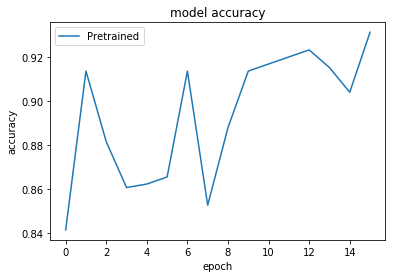

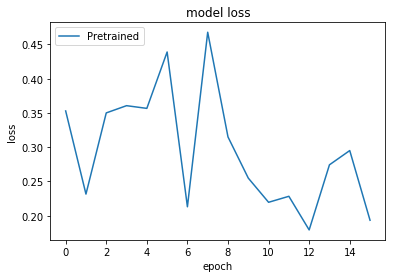

In [21]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_pretrained.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_pretrained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()

In [22]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False)
result = model.output
result = GlobalAveragePooling2D()(result)
# add a fully-connected layer
result = Dense(512, activation='relu')(result)
# and a fully connected output/classification layer
predictions = Dense(2, activation='sigmoid')(result)
inception_transfer = Model(inputs=model.input, outputs=predictions)
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
import tensorflow as tf
with tf.device("/device:GPU:0"):
    history_pretrained = inception_transfer.fit_generator(
    train_generator,
    epochs=16, shuffle = True, verbose = 1, validation_data = test_generator)

58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/16
326/326 [==============================] - 179s 548ms/step - loss: 0.3802 - acc: 0.8163 - val_loss: 0.6784 - val_acc: 0.5785
Epoch 2/16
326/326 [==============================] - 170s 522ms/step - loss: 0.2395 - acc: 0.9020 - val_loss: 0.2976 - val_acc: 0.8686
Epoch 3/16
326/326 [==============================] - 171s 524ms/step - loss: 0.1935 - acc: 0.9248 - val_loss: 0.2572 - val_acc: 0.8974
Epoch 4/16
326/326 [==============================] - 169s 517ms/step - loss: 0.1447 - acc: 0.9448 - val_loss: 0.2617 - val_acc: 0.9071
Epoch 5/16
326/326 [==============================] - 170s 521ms/step - loss: 0.1433 - acc: 0.9421 - val_loss: 0.2145 - val_acc: 0.9199
Epoch 6/16
326/326 [==============================] - 170s 520ms/step - loss: 0.1357 - acc: 0.9505 - val_loss: 0.2235 - val_acc: 0.9151
Epoch 7/16
326/326 [==============================] - 169s 518ms/step - loss: 0.1137 - acc: 0.9559 - val_loss: 0.2751 -

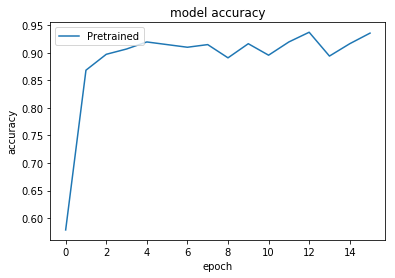

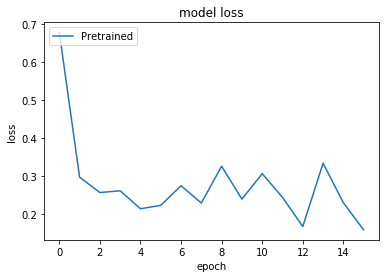

In [23]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_pretrained.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_pretrained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()

In [24]:
scores = inception_transfer.evaluate_generator(test_generator)
print('acc =',scores[1]*100)

acc = 93.58974358974359
